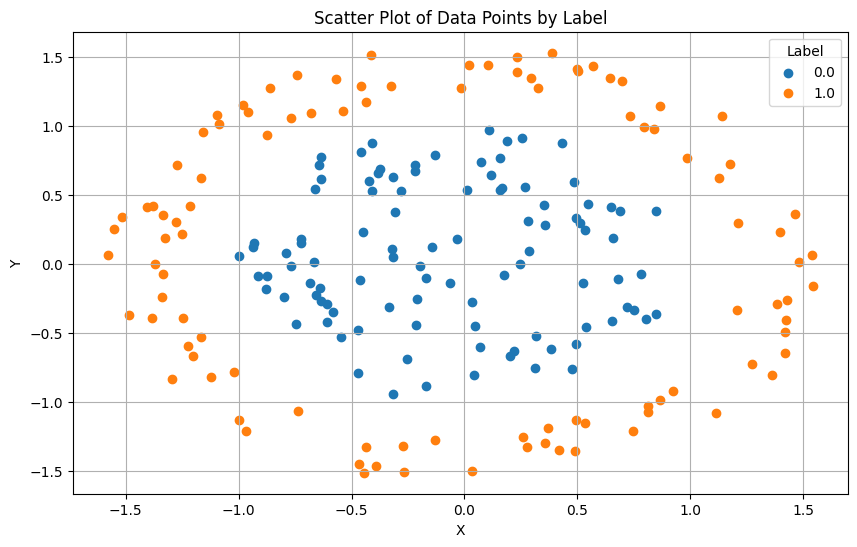

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'MadaLine.csv' with the actual path to your CSV file
file_path = 'MadaLine.csv'

# Read the CSV file
data = pd.read_csv(file_path, header=None, names=['x', 'y', 'label'])

# Separate the data into groups based on the 'label' column
label_groups = data.groupby('label')

# Create a scatter plot for each label group
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for label, group in label_groups:
    plt.scatter(group['x'], group['y'], label=label)

plt.title('Scatter Plot of Data Points by Label')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='Label')
plt.grid(True)
plt.show()


Epoch [100/1000], Loss: 0.16520360112190247
Epoch [200/1000], Loss: 0.11811885982751846
Epoch [300/1000], Loss: 0.053019482642412186
Epoch [400/1000], Loss: 0.049930471926927567
Epoch [500/1000], Loss: 0.049902014434337616
Epoch [600/1000], Loss: 0.04989992454648018
Epoch [700/1000], Loss: 0.04989975690841675
Epoch [800/1000], Loss: 0.049899742007255554
Epoch [900/1000], Loss: 0.04989974945783615
Epoch [1000/1000], Loss: 0.04989974573254585
Test Loss: 0.060160793364048004


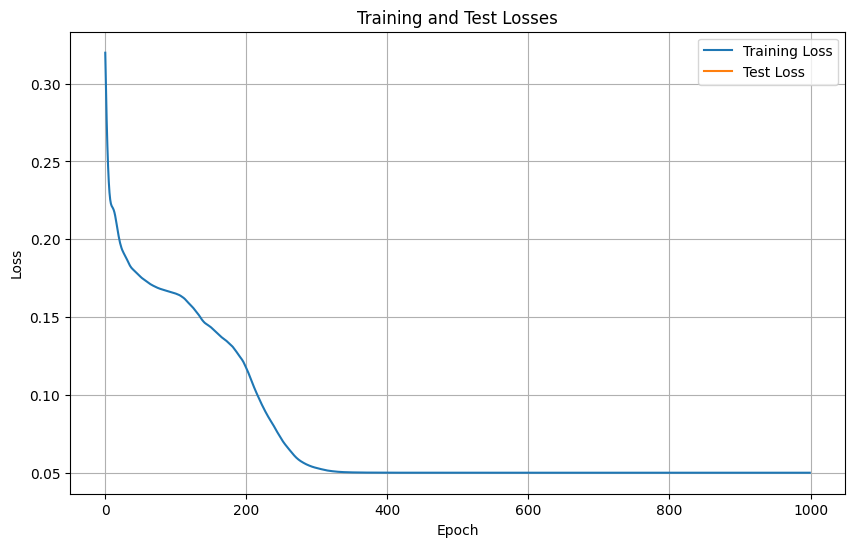

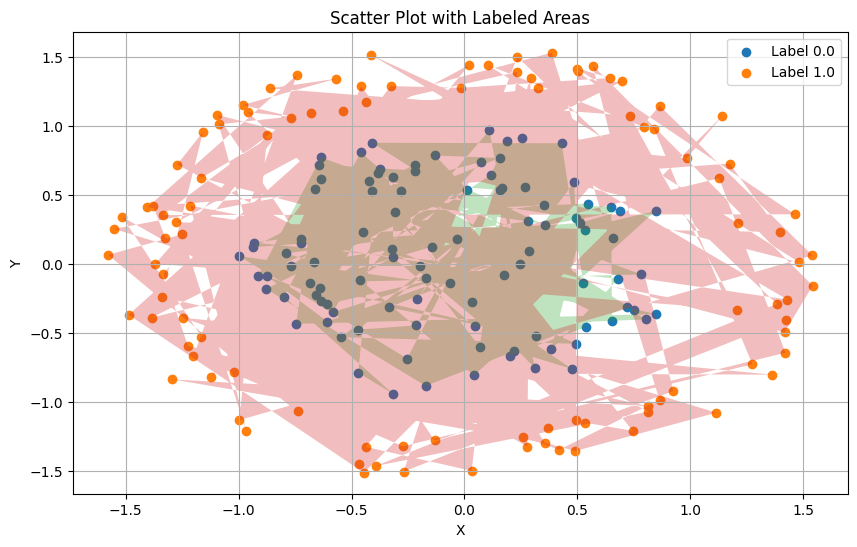

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset (assuming you have already loaded it as 'data')
# Separate the features (x) and labels (y)
X = data[['x', 'y']].values
y = data['label'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define your neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 3)  # Input layer to hidden layer
        self.fc2 = nn.Linear(3, 1)  # Hidden layer to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation to hidden layer
        x = self.fc2(x)
        return x

# Initialize the model
model = Net()

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer with learning rate 0.01

# Training loop
num_epochs = 1000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))  # Calculate the loss

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Store training loss
    train_losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# Evaluate the model on the test data
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test.view(-1, 1))

    # Store test loss
    test_losses.append(test_loss.item())

print(f'Test Loss: {test_loss.item()}')

# Plot training and test losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Losses')
plt.grid(True)
plt.show()
# Separate the features (x), labels (y), and unique labels
X = data[['x', 'y']].values
y = data['label'].values
unique_labels = pd.unique(y)

# Create a scatter plot for each label
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for label in unique_labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], label=f'Label {label}')

# Create polygons for labeled areas
for label in unique_labels:
    mask = (y == label)
    x_values = X[mask, 0]
    y_values = X[mask, 1]
    plt.fill(x_values, y_values, alpha=0.3)

plt.title('Scatter Plot with Labeled Areas')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Epoch [100/1000], Loss: 0.16765208542346954
Epoch [200/1000], Loss: 0.09321201592683792
Epoch [300/1000], Loss: 0.045285437256097794
Epoch [400/1000], Loss: 0.043621111661195755
Epoch [500/1000], Loss: 0.04268457740545273
Epoch [600/1000], Loss: 0.04265987500548363
Epoch [700/1000], Loss: 0.04265623167157173
Epoch [800/1000], Loss: 0.04265569522976875
Epoch [900/1000], Loss: 0.04265560954809189
Epoch [1000/1000], Loss: 0.04265572130680084
Test Loss: 0.06339724361896515


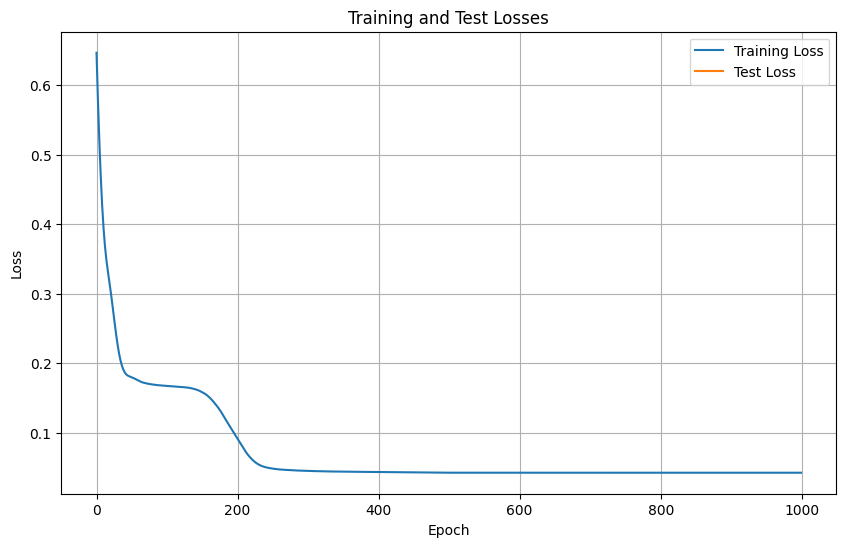

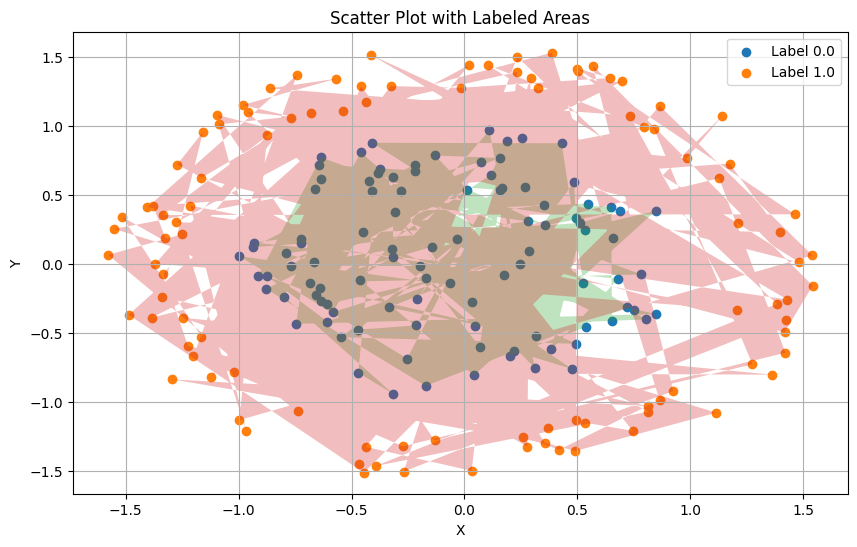

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset (assuming you have already loaded it as 'data')
# Separate the features (x) and labels (y)
X = data[['x', 'y']].values
y = data['label'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define your neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 4 )  # Input layer to hidden layer
        self.fc2 = nn.Linear( 4 , 1)  # Hidden layer to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation to hidden layer
        x = self.fc2(x)
        return x

# Initialize the model
model = Net()

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer with learning rate 0.01

# Training loop
num_epochs = 1000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))  # Calculate the loss

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Store training loss
    train_losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# Evaluate the model on the test data
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test.view(-1, 1))

    # Store test loss
    test_losses.append(test_loss.item())

print(f'Test Loss: {test_loss.item()}')

# Plot training and test losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Losses')
plt.grid(True)
plt.show()
# Separate the features (x), labels (y), and unique labels
X = data[['x', 'y']].values
y = data['label'].values
unique_labels = pd.unique(y)

# Create a scatter plot for each label
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for label in unique_labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], label=f'Label {label}')

# Create polygons for labeled areas
for label in unique_labels:
    mask = (y == label)
    x_values = X[mask, 0]
    y_values = X[mask, 1]
    plt.fill(x_values, y_values, alpha=0.3)

plt.title('Scatter Plot with Labeled Areas')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Epoch [100/1000], Loss: 0.053176067769527435
Epoch [200/1000], Loss: 0.03592957183718681
Epoch [300/1000], Loss: 0.03035171702504158
Epoch [400/1000], Loss: 0.02870446816086769
Epoch [500/1000], Loss: 0.026753399521112442
Epoch [600/1000], Loss: 0.02396133914589882
Epoch [700/1000], Loss: 0.02285868301987648
Epoch [800/1000], Loss: 0.022122127935290337
Epoch [900/1000], Loss: 0.021532725542783737
Epoch [1000/1000], Loss: 0.02092917449772358
Test Loss: 0.023920327425003052


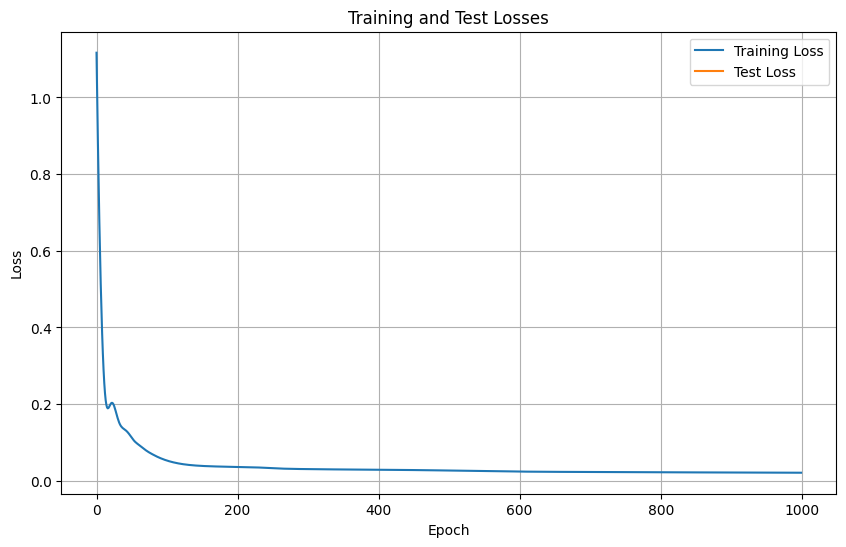

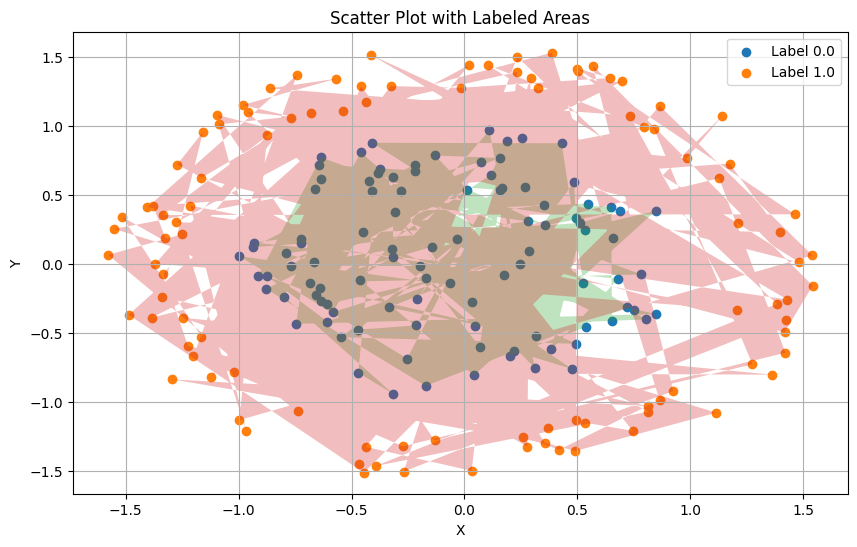

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset (assuming you have already loaded it as 'data')
# Separate the features (x) and labels (y)
X = data[['x', 'y']].values
y = data['label'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define your neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 10 )  # Input layer to hidden layer
        self.fc2 = nn.Linear( 10 , 1)  # Hidden layer to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation to hidden layer
        x = self.fc2(x)
        return x

# Initialize the model
model = Net()

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer with learning rate 0.01

# Training loop
num_epochs = 1000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))  # Calculate the loss

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Store training loss
    train_losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# Evaluate the model on the test data
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test.view(-1, 1))

    # Store test loss
    test_losses.append(test_loss.item())

print(f'Test Loss: {test_loss.item()}')

# Plot training and test losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Losses')
plt.grid(True)
plt.show()
# Separate the features (x), labels (y), and unique labels
X = data[['x', 'y']].values
y = data['label'].values
unique_labels = pd.unique(y)

# Create a scatter plot for each label
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for label in unique_labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], label=f'Label {label}')

# Create polygons for labeled areas
for label in unique_labels:
    mask = (y == label)
    x_values = X[mask, 0]
    y_values = X[mask, 1]
    plt.fill(x_values, y_values, alpha=0.3)

plt.title('Scatter Plot with Labeled Areas')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Epoch [100/1000], Loss: 0.021828411146998405
Epoch [200/1000], Loss: 0.01736536994576454
Epoch [300/1000], Loss: 0.015610662288963795
Epoch [400/1000], Loss: 0.014308154582977295
Epoch [500/1000], Loss: 0.013168451376259327
Epoch [600/1000], Loss: 0.011989859864115715
Epoch [700/1000], Loss: 0.010985782369971275
Epoch [800/1000], Loss: 0.009721500799059868
Epoch [900/1000], Loss: 0.008940774947404861
Epoch [1000/1000], Loss: 0.008422927930951118
Test Loss: 0.023362580686807632


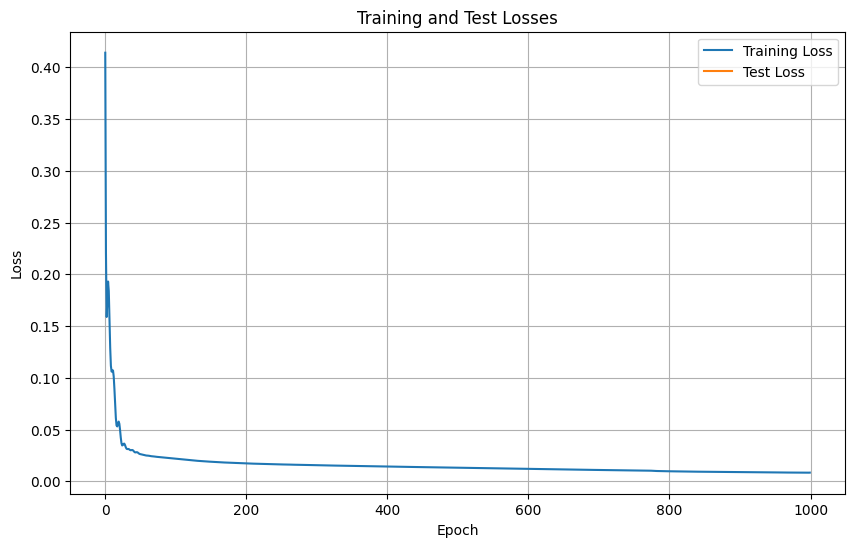

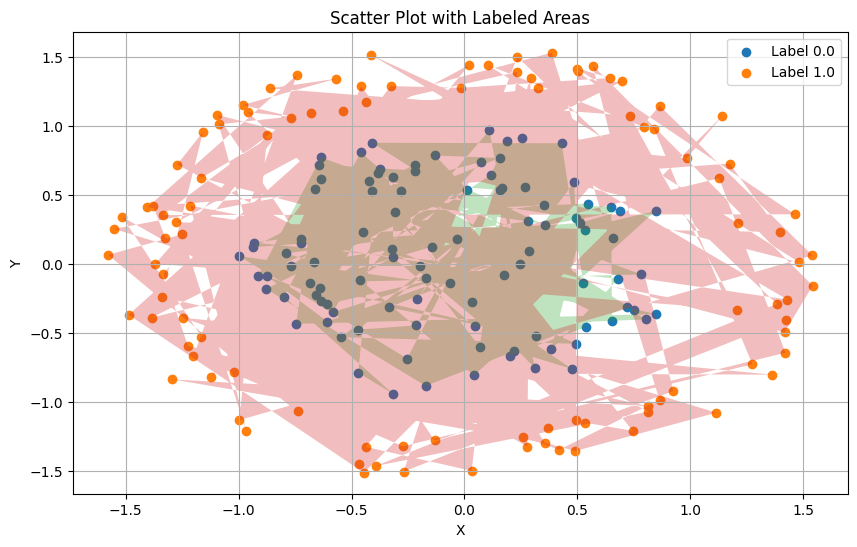

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset (assuming you have already loaded it as 'data')
# Separate the features (x) and labels (y)
X = data[['x', 'y']].values
y = data['label'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define your neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 100 )  # Input layer to hidden layer
        self.fc2 = nn.Linear( 100 , 1)  # Hidden layer to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation to hidden layer
        x = self.fc2(x)
        return x

# Initialize the model
model = Net()

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer with learning rate 0.01

# Training loop
num_epochs = 1000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))  # Calculate the loss

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Store training loss
    train_losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# Evaluate the model on the test data
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test.view(-1, 1))

    # Store test loss
    test_losses.append(test_loss.item())

print(f'Test Loss: {test_loss.item()}')

# Plot training and test losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Losses')
plt.grid(True)
plt.show()
# Separate the features (x), labels (y), and unique labels
X = data[['x', 'y']].values
y = data['label'].values
unique_labels = pd.unique(y)

# Create a scatter plot for each label
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for label in unique_labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], label=f'Label {label}')

# Create polygons for labeled areas
for label in unique_labels:
    mask = (y == label)
    x_values = X[mask, 0]
    y_values = X[mask, 1]
    plt.fill(x_values, y_values, alpha=0.3)

plt.title('Scatter Plot with Labeled Areas')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()